<a href="https://colab.research.google.com/github/ricardoianelli/portfolio-data-science/blob/master/Analisando_dados_do_airbnb_rj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

# Analisando dados do Airbnb - Rio de Janeiro

Há alguns anos atrás, encontrar um local para ficar durante uma viagem era uma tarefa complicada: ficávamos à mercê de hoteis e pousadas que, apesar do luxo, não costumam ser tão acessíveis financeiramente.

Tudo isso mudou com o avanço da tecnologia *(ainda bem!)* e atualmente temos acesso a diversos serviços que não existiam anos atrás, entre eles, o Airbnb. <br>
<br>

O [Airbnb](https://www.airbnb.com.br/) é uma rede de hospedagem onde usuários podem colocar seus imóveis (inteiros ou partes, como quartos) para aluguel por curtos períodos de tempo e por preços acessíveis, tornando-se uma ótima alternativa aos hoteis e pousadas. **Inclusive**, em 2017 já [hospedava mais pessoas que as cinco maiores redes hoteleiras do mundo somadas](https://https://www.businessinsider.com/airbnb-total-worldwide-listings-2017-8). <br>
<br>

**Fato curioso:** tudo isso sem possuir *um hotel sequer*. <br>
<br>

Uma das coisas legais do Airbnb é que eles disponibilizam alguns de seus dados em seu portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), ajudando aqueles que utilizam dados para fazer análises.<br>
<br>

**O que podemos fazer com esses dados?** <br>

<img alt="Rio de Janeiro" width="100%" src="https://www.avianca.com/content/dam/avianca_new/destinos/gig/br_gig_apertura_1.jpg">

Por ser considerada o maior destino turístico internacional no Brasil, da América Latina e de todo o Hemisfério Sul [(fonte)](https://oglobo.globo.com/rio/rio-de-janeiro-o-principal-destino-turistico-do-hemisferio-sul-segundo-consultoria-3062220), a cidade do Rio de Janeiro, que já foi capital do Brasil, é um ótimo local para analisarmos quando se fala em hospedagem. 

Vamos analisar os dados da cidade, divulgados em Novembro de 2019, e tentar responder algumas questões como [Qual a média de preços de aluguel](https://colab.research.google.com/drive/1g1ld5PDZvy1CrUI4uVHtENgC5D2yeOQB#scrollTo=7x4aw1j5wNmn), [Qual o tipo de imóvel mais alugado](https://colab.research.google.com/drive/1g1ld5PDZvy1CrUI4uVHtENgC5D2yeOQB#scrollTo=7b6RMWpuHKN-) e [Qual a localidade mais cara no RJ](https://colab.research.google.com/drive/1g1ld5PDZvy1CrUI4uVHtENgC5D2yeOQB#scrollTo=MFa5NbnLJMcd). <br>
<br>

**Vamos começar?**

## Obtenção dos Dados

O processo como um todo terá bastante código, mas tentarei explicar de forma bem simples o passo a passo. Estamos falando de analisar dados, então eu poderia fazer as contas da parte estatística *na mão*, mas não vou. Outras pessoas já facilitaram nossa vida criando ferramentas que fazem essas contas por nós, e é por isso que utilizarei uma linguagem de programação (Python) para me auxiliar durante o processo de análise.
Junto a isso, vou importar algumas dessas ferramentas para facilitar nosso trabalho.


In [0]:
!pip install geopandas | grep -v 'already satisfied'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings

Importamos nossas ferramentas, vou apenas deixar um comando para que os gráficos sejam gerados aqui no documento, e não em uma nova janela. Aproveitaremos para esconder mensagens de aviso dessas bibliotecas. (Por exemplo, avisos de que uma função se tornará obsoleta nas próximas versões, etc)

In [0]:
%matplotlib inline
warnings.filterwarnings('ignore')

Agora precisamos importar nossos dados. Como citado antes, o Airbnb disponibiliza alguns dados para o público. Esses dados são em formato **csv** (**comma separated values**, traduzidos para português como **valores separados por vírgula**), o que significa que os dados vêm no seguinte formato:



```
nome, idade, comida_favorita
ricardo, 28, lasanha
vitória, 22, hamburguer
hannibal, 81, carne
```

Uma das bibliotecas (ferramentas) que importamos mais cedo foi o [Pandas](https://pandas.pydata.org/), que nos fornece diversas facilidades, entre elas, o uso de uma estrutura chamada **DataFrame**, que se assemelha a uma tabela, além de outras funcionalidades como a possibilidade de importar um arquivo **csv** da internet e, de forma inteligente, já transformá-lo em um **DataFrame** para manipularmos, e é isso que faremos na linha abaixo.


In [0]:
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-11-22/visualisations/listings.csv")

## Análise dos Dados


Importamos nossos dados e o transformamos em um DataFrame **df**.  
Que colunas temos em nossos dados?

In [0]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Também é uma boa ideia dar uma olhada em alguns registros para ter uma noção dos dados. Faremos isso e, em seguida, montaremos um dicionário de variáveis, ou seja, um dicionário das colunas do nosso DataFrame.

In [0]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,332,4,243,2019-11-11,2.13,1,303
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,235,2019-10-08,2.04,3,119
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,273,2,271,2019-11-21,2.38,1,88
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,378,2,169,2019-11-13,2.28,1,85
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,130,3,316,2019-11-16,2.84,1,128


**Dicionário das variáveis**

* `id` - número de identificação gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de identificação do anfitrião (proprietário) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - falarei mais dela logo mais abaixo
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel. Não há informação de moeda.
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações (reviews) que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Como você pode ter percebido, a coluna `neighbourhood_group` ficou com valores "NaN". O que seriam esses valores?

**NaN** significa "*Not a Number*", e é mostrado onde deveríamos ter um valor mas não temos, ou seja, em registros nulos. Vamos tratar disso logo mais.

Por enquanto, vamos começar respondendo algumas questões sobre nossos dados.

### **Q1. Quantos atributos (variáveis, colunas) e quantas entradas (linhas) o nosso conjunto de dados possui?**

In [0]:
linhas = df.shape[0]
colunas = df.shape[1]
print("Nº de linhas: {}".format(linhas))
print("Nº de colunas: {}".format(colunas))

Nº de linhas: 33715
Nº de colunas: 16


Mas como vimos antes, alguns dados deveriam conter valores, mas não contém. Quantos dados ausentes (nulos) será que temos?

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [0]:
print("Quantos % de cada coluna está com valores faltantes?")
nulos = df.isnull().sum()
pd.DataFrame((nulos / linhas).sort_values(ascending=False), columns=["%"]).style.format('{:.2%}')

Quantos % de cada coluna está com valores faltantes?


,%
neighbourhood_group,100.00%
reviews_per_month,43.20%
last_review,43.20%
name,0.18%
host_name,0.06%
availability_365,0.00%
calculated_host_listings_count,0.00%
number_of_reviews,0.00%
minimum_nights,0.00%
price,0.00%


Ou seja: 100% da coluna `neighbourhood_group` está vazia. Por isso, vou removê-la.
Além disso, não utilizaremos a coluna `id`, visto que ela serve apenas para identificar uma oferta.

In [0]:
df.drop(['neighbourhood_group', 'id'], axis=1, inplace=True)

Agora podemos checar se realmente temos menos colunas

In [0]:
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Nossas colunas `reviews_per_month` e `last_review` possuem muitos valores ausentes também, contudo, temos de ter especial atenção: Dados nulos em uma podem não ser nulos em outra. Com isso, ao remover todos os valores nulos de ambas, podemos acabar removendo bem mais que 43.20% dos nossos dados. <br>
Além disso, **não iremos removê-las**. <br>
Por que? Vamos pensar o que seriam acomodações com `reviews_per_month` e `last_review` nulos: acomodações novas ou que nunca foram alugadas. Isso é algo que poderemos querer avaliar.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Vamos dar uma olhada em nossos dados de forma gráfica através de *histogramas*, que são gráficos de quantidade.

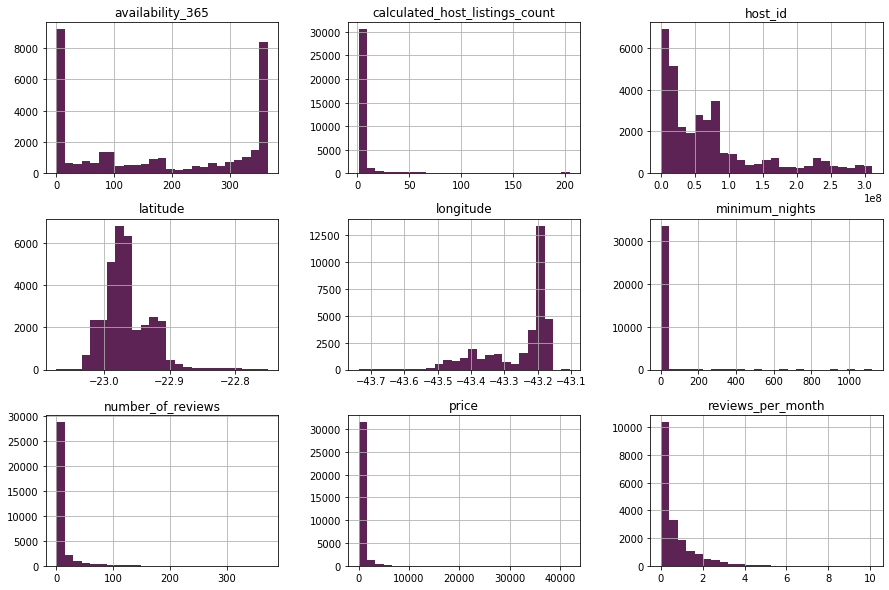

In [0]:
df.hist(bins=25, figsize=(15,10), color="#5e2355");

Podemos tirar **muitas** informações destes gráficos, mas vou aqui comentar apenas um pouco de cada um:


1. Temos, aparentemente, diversas acomodações que não estavam disponíveis em dia algum do ano, ou pouquíssimos dias. (Valores de `availability_365` próximos ou iguais a zero)
2. Observando `calculated_host_listings_count` vemos que a maioria dos anfitriões tem poucas acomodações, contudo, existem valores com cerca de 200 acomodações **(!!!)**. Isso é o que chamamos de **outlier**, um valor fora do comum. *(E é assim que aparece aquela transação de cartão de crédito que você tentou fazer na black friday e o banco te ligou pra ter certeza que era você mesmo (a) comprando.)*
3. Do gráfico de `host_id` podemos intuir que a maioria dos imóveis pertence a usuários mais antigos, isso, claro, se os `ids` dos anfitriões forem sendo incrementados de 1 a 1 para cada novo cadastro no site, fazendo com que anfitriões antigos possuam `ids` menores e anfitriões mais novos possuam `ids` maiores.
4. `latitude` e `longitude` também aparentam ter picos em determinados locais. Seriam áreas mais urbanas? Podemos explorar isso mais pra frente.
5. `minimum_nights` é um gráfico difícil. Repare no tanto de outlier sem sentido. Reservas com no mínimo 200 noites de duração? **1000 noites?!** Essa coluna com certeza precisa de uma limpeza para ser avaliada de forma mais justa.
6. `number_of_reviews` nos mostra que a maioria das acomodações tem poucas reviews (avaliações). Pode ser um indício de que a maioria das acomodações é nova, ou que alguns anfitriões podem estar tirando suas acomodações e recadastrando-as para se desfazer de reviews ruins. Para tirar qualquer uma dessas conclusões, primeiro teríamos de avaliar mais a fundo os dados.
7. A grande maioria dos preços, segundo o histograma de `prices`, é abaixo de 10000. Mesmo não sabendo se é em dólares ou reais, ainda é um valor estranho, dez mil uma diária? Vamos trabalhar um pouco mais esses dados removendo outliers.
8. A maioria das acomodações, segundo o histograma de `reviews_per_month`, tem em média menos de 2 avaliações por mês. Isso pode significar muitas coisas, por exemplo, acomodações que funcionam mais no verão e, por ficarem vazias no resto do ano, tem sua média de avaliações jogada para baixo.


Alguns gráficos ficaram difíceis de observar devido a outliers. Vamos limpar um pouco os dados e tentar novamente visualizar os histogramas.

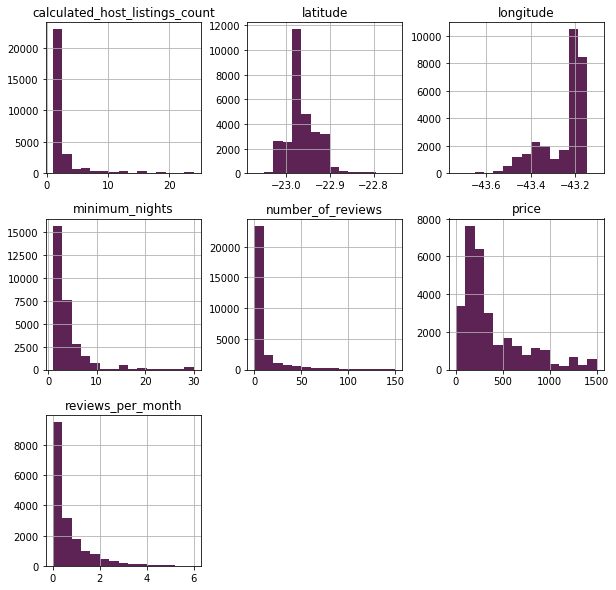

In [0]:
df_clean = df.copy()
df_clean.drop(columns=["availability_365","host_id"], inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 25].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 150].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 6].index, axis=0, inplace=True)
df_clean.hist(bins=15, figsize=(10,10), color="#5e2355");

Agora fica muito mais fácil de entender o comportamento de cada um.

### **Q4. Qual a média dos preços de aluguel?**

Como vimos anteriormente, precisamos fazer uma limpeza nos dados para ter uma noção melhor dos preços. Vamos olhar as estatísticas da coluna utilizando nosso amado Python.

In [0]:
df_clean['price'].describe()

count    29415.000000
mean       380.441645
std        334.377720
min          0.000000
25%        151.000000
50%        252.000000
75%        500.000000
max       1500.000000
Name: price, dtype: float64

Uma média de 380 por dia, um desvio padrão de 334 (nossos dados estão bem espalhados) e 50% dos valores com diária abaixo de 253. Há algo estranho, contudo: valores com preço igual a 0. 
Não acredito que estejam disponibilizando acomodações humanitárias, portanto, removeremos todas as acomodações com preço zero.

In [0]:
df_clean.drop(df_clean[df_clean.price <= 0].index, axis=0, inplace=True)
df_clean['price'].describe()

count    29408.000000
mean       380.532202
std        334.365987
min         17.000000
25%        151.000000
50%        252.000000
75%        500.000000
max       1500.000000
Name: price, dtype: float64

Agora sim, nossas estatísticas se mantiveram basicamente iguais, mas dessa vez podemos ver que o imóvel mais barato (e não de graça) custa 17. Infelizmente não temos como saber se dólares, reais, ou outra moeda apenas olhando os dados, porém, fiz uma visita no dia (17/12/2019) ao [website do Airbnb](https://www.airbnb.com.br/) e consultei os preços para acomodações no Rio de Janeiro, verificando o que vocês podem ver na imagem a seguir:

![Média de preços do Airbnb em Dez. 2019](https://scontent.fsdu17-1.fna.fbcdn.net/v/t1.0-9/79388122_3891593054199632_2413502742514368512_o.jpg?_nc_cat=102&_nc_ohc=vV0KCrHcjdcAQkvYsdnT266WvSKFYkSzM5zrwcw_3nelPKBo8dXWcUowg&_nc_ht=scontent.fsdu17-1.fna&oh=5171044660f3a719eec0b83ef395b010&oe=5E743846)

Repare que o preço médio por noite está bem próximo do valor dos dados, que são de 1 mês atrás: apenas R\$ 5 de diferença. Com isso, vamos supor a partir de agora que o valor de preços nos dados está em **Reais (R\$)**.

### **Q4. Qual a correlação existente entre as variáveis**

A correlação é uma medida de quão relacionadas as variações de duas medidas estão, ou, em termos mais simplificados ainda, o quanto ambas mudam seus valores de forma similar. 
**Alguns exemplos:** 
1. Conforme a temperatura ambiente aumenta, aumentam também o número de pessoas usando bermudas.
2. Conforme a temperatura ambiente cai, o número de vendas de sopa aumenta.
3. Conforme filmes do Nicolas Cage são lançados, aumenta o número de pessoas que morrem afogadas em piscinas. 

Pera. **O QUE?**

Coloquei [esse exemplo real](http://tylervigen.com/view_correlation?id=359) para deixar claro que correlação não significa causalidade. Ou seja: Por mais que ambos variem de forma que pareça que um causa o outro, isso não é regra, ou seja, **coisas podem ter correlações altas mas serem totalmente independentes uma da outra**.

Vamos dar uma olhada na correlação entre os dados:

In [0]:
corr = df_clean.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
latitude,1,0.35,-0.18,-0.048,-0.078,-0.068,-0.08
longitude,0.35,1,-0.16,-0.069,0.14,0.017,0.065
price,-0.18,-0.16,1,0.21,-0.19,-0.18,-0.082
minimum_nights,-0.048,-0.069,0.21,1,-0.1,-0.14,-0.049
number_of_reviews,-0.078,0.14,-0.19,-0.1,1,0.57,0.049
reviews_per_month,-0.068,0.017,-0.18,-0.14,0.57,1,0.038
calculated_host_listings_count,-0.08,0.065,-0.082,-0.049,0.049,0.038,1


Uma outra forma de observar correlações é através de um **HeadMap**, ou, em português, **mapa de calor**. Para isso, vamos utilizar outra biblioteca (ferramenta) para desenho de gráficos, o **Seaborn**.

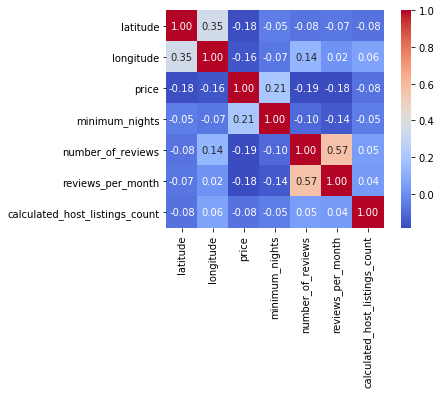

In [0]:
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', square=True, linecolor='white', annot=True);

Cores mais próximas do vermelho significam altas correlações, enquanto que cores mais pro azul significam baixa correlação. Se repararamos na diagonal principal dessa tabela (essa "linha" diagonal de valores **1** vermelhos), todos tem correlação perfeita: valor **1**. Não se deixe enganar, é bem óbvio que ***price*** tenha relação perfeita com ***price***: ambos são a mesma coluna!

Fora isso, percebemos uma correlação entre `reviews_per_month` e `number_of_reviews`, o que faz total sentido: Com mais avaliações por mês, nosso total de avaliações cresce também.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Em nossos dados temos uma coluna chamada `room_type`. Olhando de volta no nosso [dicionário de variáveis](https://colab.research.google.com/drive/1g1ld5PDZvy1CrUI4uVHtENgC5D2yeOQB#scrollTo=RYgvuebKNg8-), vemos que a descrição que demos foi: "**informa o tipo de quarto que é oferecido**".
Uma boa forma de descorbri o tipo de imóvel mais alugado é olhar a quantidade de registros com cada tipo de `room_type`.


In [0]:
room_types = df_clean.room_type.value_counts()
room_types

Entire home/apt    19977
Private room        8466
Shared room          694
Hotel room           271
Name: room_type, dtype: int64

In [0]:
print("Do total de acomodações, quantos % cada tipo de acomodação ocupa?")
room_percent = room_types / df_clean.shape[0];
pd.DataFrame(room_percent).style.format('{:.2%}')


Do total de acomodações, quantos % cada tipo de acomodação ocupa?


,room_type
Entire home/apt,67.93%
Private room,28.79%
Shared room,2.36%
Hotel room,0.92%


Ou seja, de todas as 33715 acomodações do Rio de Janeiro, **aproximadamente**: 

*   68% são alugueis de um local inteiro; (apartamento ou casa inteira)
*   29% são alugueis de quarto privado em quarta compartilhada;
*   2% são quartos compartilhados;
*   1% são quartos de hotel.

Para ficar melhor ainda compreender essa diferença, vamos tentar demonstar isso visualmente:

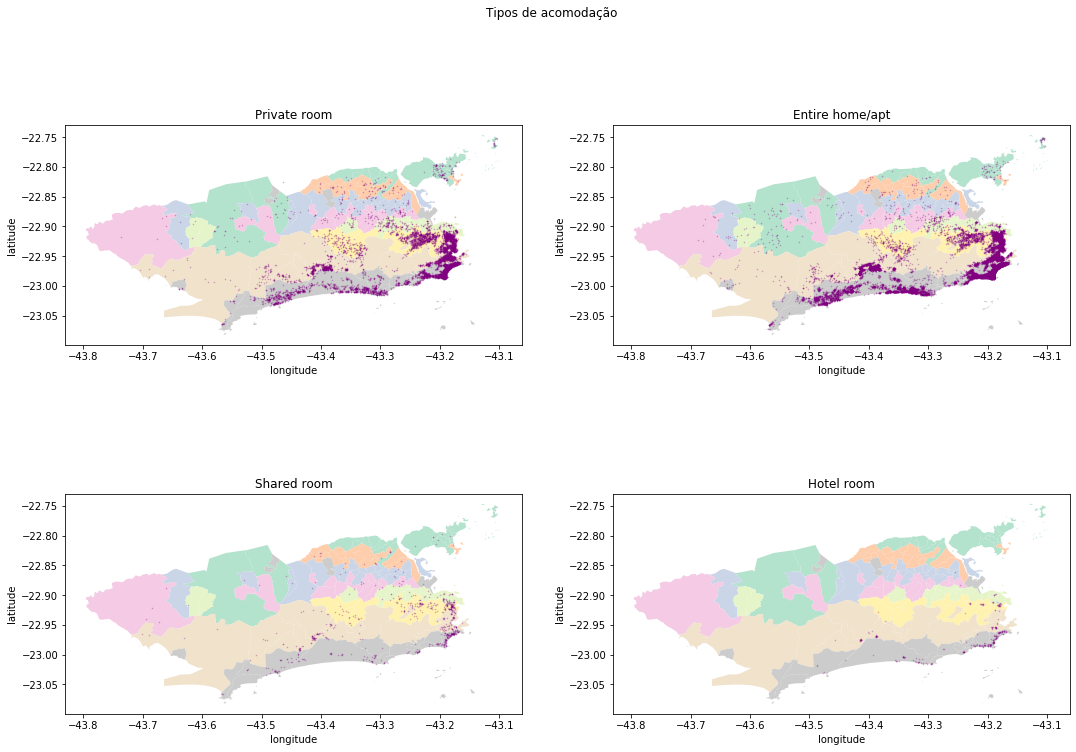

In [0]:
rj_shape = gpd.read_file('https://opendata.arcgis.com/datasets/8454eb0454b7424d89c61b67742286a1_3.zip')
rj_shape = rj_shape.to_crs({'init': 'epsg:4326'})

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(18,12))
fig.subplots_adjust(wspace=0.2, hspace=0.3);

for ax, room_type in zip(axes.flatten(), df_clean.room_type.unique()):
    room_filtered_df = df_clean[df_clean.room_type == room_type]
    ax.set(title=room_type);
    rj_shape_map = rj_shape.plot(ax=ax, cmap="Pastel2")
    room_filtered_df.plot(title=room_type,kind="scatter",x='longitude',
        y='latitude', alpha=0.3, s=0.3,ax=rj_shape_map,subplots=True,color="purple");

fig.suptitle('Tipos de acomodação');

Cada pontinho é uma acomodação. Repare que pontos solitários são quase invisíveis, portanto, regiões com a cor mais forte significam vários imóveis "um em cima do outro" no mapa devido ao fato de estarem muito próximos entre si.

### **Q6. Qual a localidade mais cara do dataset?**



Uma possibilidade para tentar responder essa pergunta poderia ser olhar a média de preços por região.

In [0]:
expensive_neigh_list = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
expensive_neigh_list

neighbourhood
Engenheiro Leal           1499.000000
Vaz Lobo                  1024.500000
Ricardo de Albuquerque     639.250000
Vicente de Carvalho        623.333333
Complexo do Alemão         520.500000
Jacarepaguá                506.999442
Guaratiba                  498.900000
Barra da Tijuca            498.647829
Lagoa                      495.571429
Leblon                     494.712363
Name: price, dtype: float64

Contudo, será que os dados de cada bairro são realmente representativos, ou seja, será que existem **dados o suficiente** em cada bairro?
Além disso, a média é uma medida perigosa pois é influenciada pela dispersão dos dados, ou seja: Se você tem valores extremos, sua média pode não representar bem a realidade dos seus dados.

In [0]:
expensive_list = expensive_neigh_list.keys().to_list()
expensive['neighbourhood'].loc[df['neighbourhood'].isin(expensive_list)].value_counts().sort_values(ascending=False)

Barra da Tijuca           3132
Jacarepaguá               1792
Leblon                    1189
Lagoa                      322
Guaratiba                   50
Vicente de Carvalho          6
Ricardo de Albuquerque       4
Complexo do Alemão           4
Vaz Lobo                     2
Engenheiro Leal              1
Name: neighbourhood, dtype: int64

Reparem que metade dos bairros possuem menos de **dez** acomodações. Deviam eles realmente serem levados em conta pela média, ou levados em conta de qualquer outra forma? Os dados não parecem representativos, por exemplo, os **dois** imóveis em **Vaz Lobo** com certeza não devem conseguir representar o **bairro inteiro**. <br>

Existem inúmeras formas de atacar esse problema, contudo, iremos pelo caminho simples e faremos apenas duas coisas: <br>
- Remover bairros com menos de 10 acomodações e ranquear pela média novamente.
- Fazer um ranking também pela mediana, que não é afetada pela dispersão dos dados.

**Remover bairros com menos de 10 acomodações e ranquear pela média novamente**

In [0]:
neigh_values_filter = df_clean['neighbourhood'].map(df_clean['neighbourhood'].value_counts() > 10)
neigh_df_filtered = df_clean[neigh_values_filter]
neigh_by_mean = neigh_df_filtered.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
neigh_by_mean

neighbourhood
Jacarepaguá                 506.999442
Guaratiba                   498.900000
Barra da Tijuca             498.647829
Lagoa                       495.571429
Leblon                      494.712363
Maracanã                    484.051471
Recreio dos Bandeirantes    482.533793
São Conrado                 455.565476
Alto da Boa Vista           453.368421
Gávea                       449.800766
Name: price, dtype: float64

Agora sim os valores fazem mais sentido. Contudo, vamos analisar por outro ângulo também: **a mediana**.

In [0]:
neigh_by_median = neigh_df_filtered.groupby(['neighbourhood']).price.median().sort_values(ascending=False)[:10]
neigh_by_median

neighbourhood
Leblon                      399.0
Riachuelo                   399.0
Lagoa                       380.0
Jacarepaguá                 365.0
Gardênia Azul               348.5
Barra da Tijuca             348.0
Recreio dos Bandeirantes    348.0
Higienópolis                327.0
Ipanema                     323.0
São Conrado                 315.0
Name: price, dtype: float64

Podemos ver uma diferença entre alguns bairros e valores. Isso ocorre porque ao observar a média, estamos levando em conta tanto preços mais altos que o comum quanto preços mais baixos. Já na observação da mediana, levamos em conta apenas o valor médio. Uma boa maneira de compreender essa diferença é a partir do seguinte exemplo:
<br>

Em uma escola existem cinco pessoas. Seus pesos são:
- Aluno 1: 40 kg
- Aluno 2: 32 kg
- Aluno 3: 38 kg
- Aluno 4: 50 kg
- Professor: 140 kg

Nesse caso, a média seria calculada somando as massas de todo mundo e dividindo pelo número de pessoas, ou seja:

40 + 32 + 38 + 50 + 140 = 300 kg <br>
300 dividido por 5 (são 5 pessoas) = 60 kg.

Ou seja, a média da turma é de 60kg. Será que isso realmente condiz com a verdade? Bem, a realidade é que **nenhuma das crianças** sequer chega a pesar 60 kg, ou seja, descrever os pesos dessa sala de aula pela média não seria uma boa, e isso ocorre porque o peso do professor "puxa" a média para cima, distorcendo os resultados.

Já através de uma avaliação pela mediana, teríamos algo diferente. Vamos dar uma olhada.

- Primeiro organizamos os pesos em ordem crescente: 32, 38, 40, 50, 140.
- Em seguida, olhamos para a medida central. Como temos 5 medidas, o centro seria a medida nº 3, ou seja, **40 kg**, e essa seria nossa mediana.

40 kg descreve muito melhor a turma, contudo, esconde a informação de que uma das pessoas lá dentro, o professor, pesa **muito mais** que isso.

Por isso, não existe a melhor descrição, existe a situação em que se deseja averiguar e, por isso, é sempre bom observar por diferentes ângulos. Apesar de termos valores diferentes olhando pela média e pela mediana, alguns valores são comuns entre ambos. São eles:


In [0]:
neigh_by_mean_set = set(neigh_by_mean.keys().to_list())
neigh_by_median_set = set(neigh_by_median.keys().to_list())
neigh_by_mean_set.intersection(neigh_by_median_set)

{'Barra da Tijuca',
 'Jacarepaguá',
 'Lagoa',
 'Leblon',
 'Recreio dos Bandeirantes',
 'São Conrado'}

Ou seja, estes bairros são, provavelmente, os mais caros deste conjunto de dados.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Novamente, dependendo do que quiséssemos observar, simplesmente pegar a média não seria uma boa. Contudo, para finalizar nossa análise, vamos pegar leve e observar apenas a média do mínimo de noites para os aluguéis:

In [0]:
df_clean['minimum_nights'].mean()

3.4924170293797605

Ou seja, o mínimo de noites é aproximadamente 3 noites. Talvez por ser o ideal para aluguéis de fim de semana: **sexta, sábado e domingo**.

## Conclusões


Espero que tenha conseguido demonstrar um pouco do poder que os dados tem de nos dar respostas e contar histórias.
<br><br>
Saber lidar com essas respostas pode gerar grande valor se utilizada da forma correta, assim como afundar totalmente um negócio por ter sido mal interpretada ou por erros na hora da análise, como, por exemplo, trocar um imóvel no Leblon por um no Complexo do Alemão porque utilizou dados não representativos em sua análise. Deve-se tomar muito cuidado, pois, [como disse o técnico da IBM George Fuechsel](https://pt.wikipedia.org/wiki/Garbage_in,_garbage_out): **"Entra lixo, sai lixo".**

Para obter mais respostas, precisaríamos de mais dados e de mais detalhamento. O Airbnb disponibiliza em seu portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) datasets com mais detalhes, contudo, uma análise mais a fundo fica para uma próxima conversa.
<br><br>
Caso tenham encontrado algum erro ou tenham alguma sugestão, não deixem de comentar! Erros são informações valiosas, além de uma oportunidade de aprimoramento, não há vergonha em assumí-los.

<br>

Muito obrigado pela leitura, até a próxima!
<br>
<br>

**Ricardo Ianelli**
<br>
**Email:** ricardoianelli@hotmail.com
<br>
[<img align="left" alt="LinkedIn - Ricardo Ianelli" width="5%" src="https://image.flaticon.com/icons/png/512/174/174857.png">](https://www.linkedin.com/in/ricardoianelli/)
[<img align="left" alt="GitHub - Ricardo Ianelli" width="6%" src="https://github.githubassets.com/images/modules/logos_page/Octocat.png">](https://github.com/ricardoianelli)


